# Using data analysis to predict Student Success at school

## Business Understanding

### Research question

Which educational, environmental and individual factors impact student’s
outcomes the most?

### Project Description

We want to show which factors are the most important in the success of a student. We have data
about the involvement of students in their studies but also the involvement of their family. Other
information about the habits and resources of students are also important to sketch their daily
environment.

### Expected results

We expect to see that the factors which contribute the most to the academic success of a student
are the one related to the lifestyle of the person. More specifically, we think that :
- The number of hours studied will impact the result because we expect that the more you study a
subject, the more you can learn and then succeed during the exam.
- Sleep hours is an important attribute because it gives us information on the physical condition of
the student.
- The motivation level should show how much the student wants to succeed and thus makes bigger
efforts to complete a task.

## Data Cleaning

### Importing required libraries 

In this section, we import the necessary libraries

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Loading the Dataset 

We use 'pandas' library to load the dataset

In [87]:
data = pd.read_csv('StudentPerformanceFactors.csv')

### Previewing the Dataset



We use `data.head()` to preview the first 15 rows of the dataset and get an overview of the data structure


In [90]:
data.head(15)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [91]:
data.info() #details on the student dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

### Checking for missing values

In [93]:
print(data.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


### Calculating missing data percentages
We calculate the percentage of missing values for each column to better understand the extent of missing data.


In [95]:
missing_values_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_values_percentage.apply(lambda x: f"{x:.2f}%"))

Hours_Studied                 0.00%
Attendance                    0.00%
Parental_Involvement          0.00%
Access_to_Resources           0.00%
Extracurricular_Activities    0.00%
Sleep_Hours                   0.00%
Previous_Scores               0.00%
Motivation_Level              0.00%
Internet_Access               0.00%
Tutoring_Sessions             0.00%
Family_Income                 0.00%
Teacher_Quality               1.18%
School_Type                   0.00%
Peer_Influence                0.00%
Physical_Activity             0.00%
Learning_Disabilities         0.00%
Parental_Education_Level      1.36%
Distance_from_Home            1.01%
Gender                        0.00%
Exam_Score                    0.00%
dtype: object


### Dropping missing values
Since the percentage of missing values is relatively small (around 1-2%), we decide to drop the rows with missing data using `data.dropna().


In [97]:
data.dropna(inplace=True)

After dropping the rows, we check again to ensure there are no missing values left in the dataset

In [99]:
print(data.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


### Encoding categorical data

First, we transform the Objects Values into Categorical Values

In [102]:
categorical_columns = data.select_dtypes(include = ['object']).columns

# transform objects into categorical values
for col in categorical_columns:
    data[col] = data[col].astype('category')

Then, we verify that the data types has been correctly changed

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Hours_Studied               6378 non-null   int64   
 1   Attendance                  6378 non-null   int64   
 2   Parental_Involvement        6378 non-null   category
 3   Access_to_Resources         6378 non-null   category
 4   Extracurricular_Activities  6378 non-null   category
 5   Sleep_Hours                 6378 non-null   int64   
 6   Previous_Scores             6378 non-null   int64   
 7   Motivation_Level            6378 non-null   category
 8   Internet_Access             6378 non-null   category
 9   Tutoring_Sessions           6378 non-null   int64   
 10  Family_Income               6378 non-null   category
 11  Teacher_Quality             6378 non-null   category
 12  School_Type                 6378 non-null   category
 13  Peer_Influence         

## Exploratory Data Analysis (EDA)

Let's plot all variables with the exam_score to see some first relationships between them.

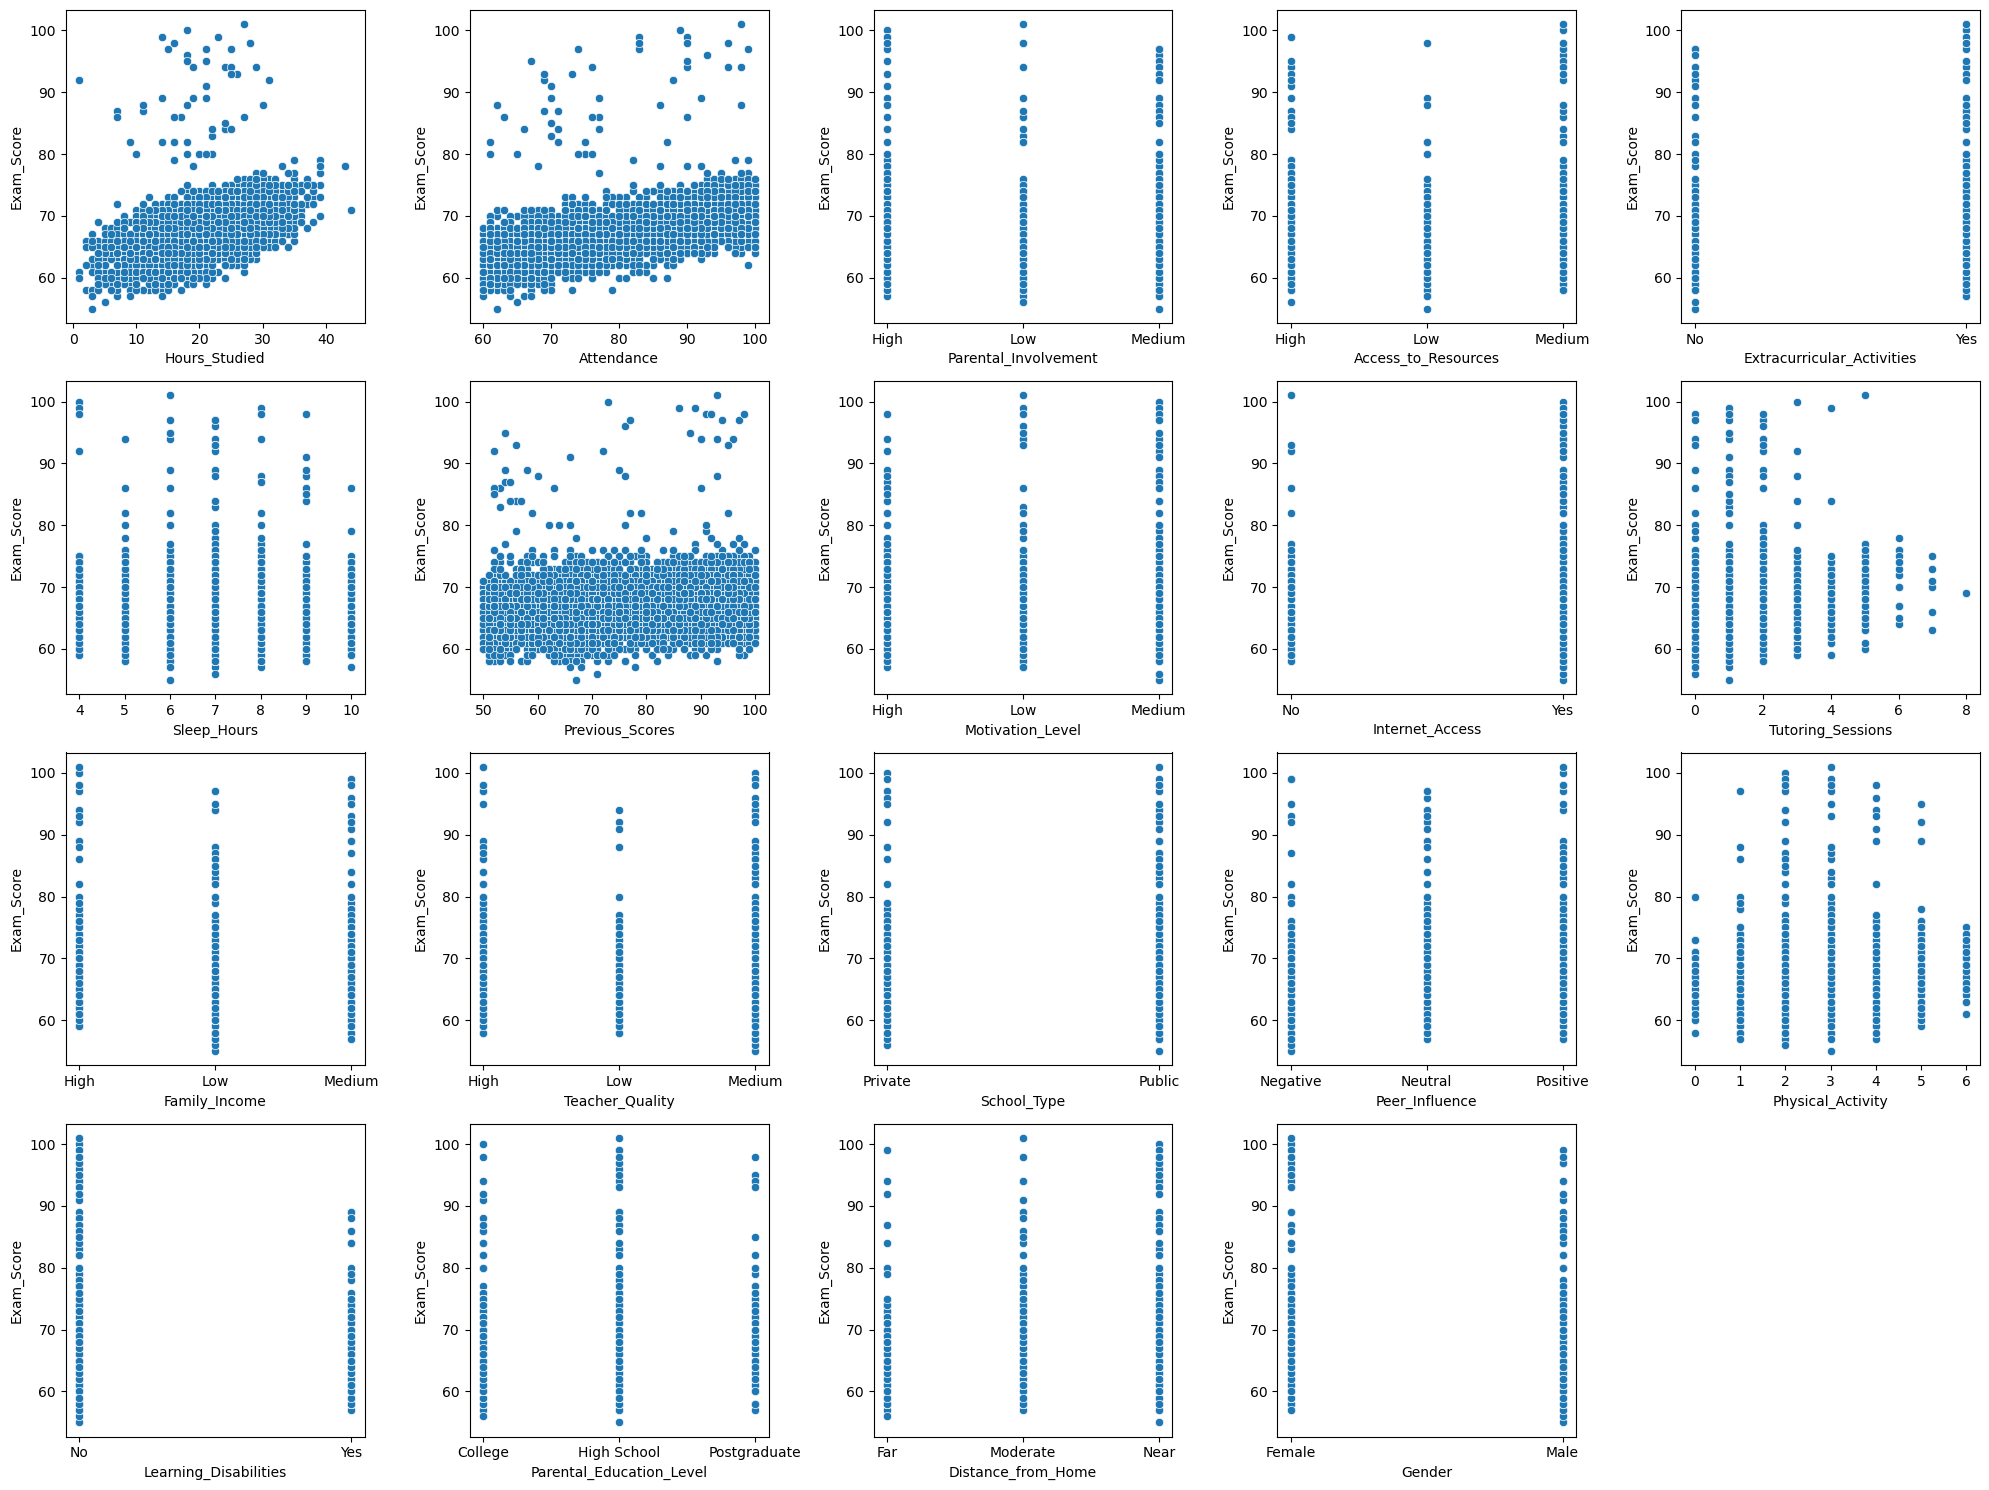

In [107]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in data:
    if plotnumber <= 19:
        ax = plt.subplot(4, 5, plotnumber)
        sns.scatterplot(x = data[column] , y = data['Exam_Score'])
        
    plotnumber += 1

plt.tight_layout()
plt.show()

#### First Interesting points

- Clear linear link :
    + Hours_studied,
    + Attendance
- Clear link :
    + Tutoring_Sessions,
    + Sleep_Hours,
    + Physical_Activity,
    + Distance_from_Home
- Noticable link :
    + Parental_Education_Level, 

In [110]:
categorical_columns = data.select_dtypes(include = ['category']).columns

# We use 'LabelEncoder' to transform the categorical variables into numerical values
le = LabelEncoder()
for col in categorical_columns: 
    data[col] = le.fit_transform(data[col])

# high = 0, low = 1, medium = 2 
data.head(15)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70
5,19,88,2,2,1,8,89,2,1,3,2,2,1,2,3,0,2,2,1,71
6,29,84,2,1,1,7,68,1,1,1,1,2,0,1,2,0,1,1,1,67
7,25,78,1,0,1,6,50,2,1,1,0,0,1,0,2,0,1,0,1,66
8,17,94,2,0,0,6,80,0,1,0,2,1,0,1,1,0,0,2,1,69
9,23,98,2,2,1,8,71,2,1,0,0,0,1,2,5,0,1,1,1,72


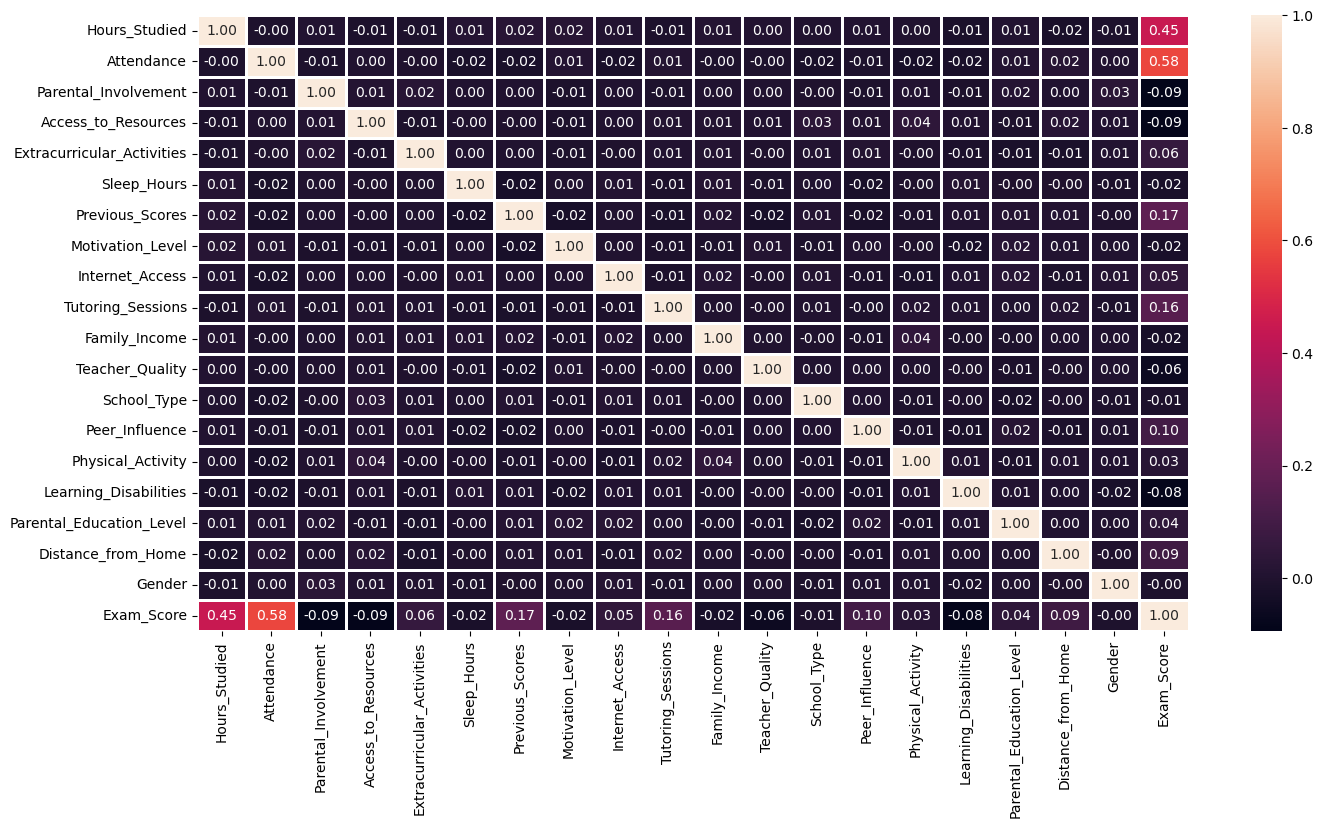

In [111]:
# Heatmap
fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(data.corr(), annot = True, fmt = '1.2f', annot_kws = {'size' : 10}, linewidth = 1)
plt.show()

Thanks to the heatmap, we see that the number of Hours_Studied and of Attendance are correlated to the Exam_Score. Other features seam to not be correlated between each other. 

## Next Steps

Remember to standardize the values before the training of the ML algorithm.  
Test different ML algorithms